# Pinpointing my Musical Taste

I am puzzled by musical taste. I enjoy music from almost all genres, but it's hard for me to pinpoint what exactly draws me to like a song. Thus, this is my attempt to build something that can understand my taste better than I can myself.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
SPOTIPY_CLIENT_ID = "17d62406985d49968bf3b7a401931a25"
SPOTIPY_CLIENT_SECRET = "2c1e008bead14569b725e522b97063d7"
adams_username = "dlr2wps2d39pnxmbu5o0zjxut"

In [2]:
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET))

In [6]:
playlists = spotify.user_playlists(adams_username)
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = spotify.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:2jE01adXXfh1ePiMG980re 24
   2 spotify:playlist:7etkOcf7ByEDQU611v8Hd0 23
   3 spotify:playlist:5KvRIeUYxCFLFsiOD8YcVB 22
   4 spotify:playlist:33iyLYqv711gFfXnrrJzcU workin
   5 spotify:playlist:1kL8VANGj8XsKPpkrsk8OR gym tunes
   6 spotify:playlist:5oDc1nAGpxc2go5uk8kEkk beer die
   7 spotify:playlist:0EzG5xEaq6BIJyGSSpoM9P snappa
   8 spotify:playlist:06L8eXndMEm3lMLOUYi2Zj Tomorrow's Listens
   9 spotify:playlist:37i9dQZF1EM93WJ5450osm Your Top Songs 2020
  10 spotify:playlist:4RXK0xcoFOou7PeivsaMfG My Peloton Music by fasky
  11 spotify:playlist:3V10L2m5tas3SUDn54vdTC graduated 
  12 spotify:playlist:6J6pQXX5b3Vh6OJnrFycpQ montage
  13 spotify:playlist:0Lq9UDhaLKYLdxcKaMmc1U date party pregame shiiii
  14 spotify:playlist:5Qbkf9FJ06PjojKQR9U8Q2 in rotation
  15 spotify:playlist:4Bcxk5WFgEQRiBgwyGlxEH most incredible songs
  16 spotify:playlist:4J8OMvnxdTuLt3fSLc5SIU relaxing
  17 spotify:playlist:254aEens69uoUuUKkHI3nZ old flavors
  18 spotify:playlist:7xoq06

In [7]:
twenty_four = spotify.playlist("2jE01adXXfh1ePiMG980re")
twenty_four_tracks = spotify.playlist_tracks("2jE01adXXfh1ePiMG980re")
twenty_four_tracks_df = pd.DataFrame.from_dict(twenty_four_tracks)
twenty_four_tracks_df.head()

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/2jE01adXX...,"{'added_at': '2022-04-15T05:04:53Z', 'added_by...",100,None,0,None,51
1,https://api.spotify.com/v1/playlists/2jE01adXX...,"{'added_at': '2022-06-16T04:34:39Z', 'added_by...",100,None,0,None,51
2,https://api.spotify.com/v1/playlists/2jE01adXX...,"{'added_at': '2022-06-13T21:29:40Z', 'added_by...",100,None,0,None,51
3,https://api.spotify.com/v1/playlists/2jE01adXX...,"{'added_at': '2022-06-10T05:16:21Z', 'added_by...",100,None,0,None,51
4,https://api.spotify.com/v1/playlists/2jE01adXX...,"{'added_at': '2022-04-08T06:30:15Z', 'added_by...",100,None,0,None,51


In [8]:
track_info_df = pd.concat(twenty_four_tracks_df["items"].apply(lambda x: pd.json_normalize(x["track"],
                                                                                           sep='_')).values.tolist())
track_info_df.index = twenty_four_tracks_df.index
twenty_four_tracks_df[track_info_df.columns] = track_info_df
twenty_four_tracks_df.head()

,href,items,limit,next,offset,previous,total,artists,available_markets,disc_number,...,album_id,album_images,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,album_uri,external_ids_isrc,external_urls_spotify
0,https://api.spotify.com/v1/tracks/4wJKTG3bAleq...,"{'added_at': '2022-04-15T05:04:53Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,6zRk8SdWozgrlByoZJkCjM,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",[BUMP] Pick Me Up,2022-04-15,day,4,album,spotify:album:6zRk8SdWozgrlByoZJkCjM,USUM72204829,https://open.spotify.com/track/4wJKTG3bAleqUXm...
1,https://api.spotify.com/v1/tracks/1mw0RgNXIpYR...,"{'added_at': '2022-06-16T04:34:39Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,5r36AJ6VOJtp00oxSkBZ5h,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Harry's House,2022-05-20,day,13,album,spotify:album:5r36AJ6VOJtp00oxSkBZ5h,USSM12200621,https://open.spotify.com/track/1mw0RgNXIpYRyyC...
2,https://api.spotify.com/v1/tracks/0B8roQfUXlQ5...,"{'added_at': '2022-06-13T21:29:40Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0v3e5S4Ah7X9qKhTyymxsG,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",STUCK (A COLORS SHOW),2022-05-03,day,1,album,spotify:album:0v3e5S4Ah7X9qKhTyymxsG,USUM72208268,https://open.spotify.com/track/0B8roQfUXlQ5gxV...
3,https://api.spotify.com/v1/tracks/6xGruZOHLs39...,"{'added_at': '2022-06-10T05:16:21Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,6ZZvx0aefZV3LKa053fn71,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Glimpse of Us,2022-06-10,day,1,album,spotify:album:6ZZvx0aefZV3LKa053fn71,USWB12201789,https://open.spotify.com/track/6xGruZOHLs39ZbV...
4,https://api.spotify.com/v1/tracks/2cqdi39J1aH0...,"{'added_at': '2022-04-08T06:30:15Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,5pjMTS389jtVjMVyx5881I,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Collapsed In Sunbeams (Deluxe),2021-01-29,day,20,album,spotify:album:5pjMTS389jtVjMVyx5881I,GBKZV2000087,https://open.spotify.com/track/2cqdi39J1aH0GZu...


## add audio features

In [64]:
audio_features_df = pd.concat(twenty_four_tracks_df["uri"].apply(lambda x: 
                                                                 pd.json_normalize(spotify.audio_features(x),
                                                                                   sep='_')).values.tolist())
audio_features_df.index = twenty_four_tracks_df.index
twenty_four_tracks_df[audio_features_df.columns] = audio_features_df
twenty_four_tracks_df[["name", "energy", "acousticness", "danceability", "instrumentalness",
                       "liveness", "loudness", "speechiness", "tempo", "valence"]].head()

,name,energy,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,[Admire Her] (with Gunna),0.507,0.3660,0.883,0.000000,0.1360,-7.188,0.2440,138.008,0.294
1,Love Of My Life,0.536,0.6690,0.555,0.000000,0.0623,-8.233,0.0452,118.057,0.203
2,STUCK - A COLORS SHOW,0.493,0.0829,0.802,0.000015,0.0974,-9.090,0.3020,159.996,0.305
3,Glimpse of Us,0.317,0.8910,0.440,0.000005,0.1410,-9.258,0.0531,169.914,0.268
4,Hurt,0.362,0.7270,0.676,0.000228,0.1680,-9.492,0.0323,94.959,0.733


In [292]:
twenty_four_tracks_df[["name", "energy", "acousticness", "danceability", "instrumentalness",
                        "liveness", "loudness", "speechiness", "tempo", "valence"]]

Index(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total',
       'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode',
       'explicit', 'id', 'is_local', 'name', 'popularity', 'preview_url',
       'track', 'track_number', 'type', 'uri', 'album_album_type',
       'album_artists', 'album_available_markets',
       'album_external_urls_spotify', 'album_href', 'album_id', 'album_images',
       'album_name', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_type', 'album_uri', 'external_ids_isrc',
       'external_urls_spotify', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_href', 'analysis_url', 'time_signature'],
      dtype='object')

In [305]:
twenty_four_tracks_df["artist_names"] = twenty_four_tracks_df["artists"].apply(lambda x:\
                                                ", ".join(pd.DataFrame.from_dict(x)["name"].values))
twenty_four_tracks_df

,href,items,limit,next,offset,previous,total,artists,available_markets,disc_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature,artist_names
0,https://api.spotify.com/v1/tracks/4wJKTG3bAleq...,"{'added_at': '2022-04-15T05:04:53Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.2440,0.366000,0.000000,0.1360,0.2940,138.008,https://api.spotify.com/v1/tracks/4wJKTG3bAleq...,https://api.spotify.com/v1/audio-analysis/4wJK...,4,"Bas, Gunna"
1,https://api.spotify.com/v1/tracks/1mw0RgNXIpYR...,"{'added_at': '2022-06-16T04:34:39Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.0452,0.669000,0.000000,0.0623,0.2030,118.057,https://api.spotify.com/v1/tracks/1mw0RgNXIpYR...,https://api.spotify.com/v1/audio-analysis/1mw0...,4,Harry Styles
2,https://api.spotify.com/v1/tracks/0B8roQfUXlQ5...,"{'added_at': '2022-06-13T21:29:40Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.3020,0.082900,0.000015,0.0974,0.3050,159.996,https://api.spotify.com/v1/tracks/0B8roQfUXlQ5...,https://api.spotify.com/v1/audio-analysis/0B8r...,4,WESTSIDE BOOGIE
3,https://api.spotify.com/v1/tracks/6xGruZOHLs39...,"{'added_at': '2022-06-10T05:16:21Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.0531,0.891000,0.000005,0.1410,0.2680,169.914,https://api.spotify.com/v1/tracks/6xGruZOHLs39...,https://api.spotify.com/v1/audio-analysis/6xGr...,3,Joji
4,https://api.spotify.com/v1/tracks/2cqdi39J1aH0...,"{'added_at': '2022-04-08T06:30:15Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.0323,0.727000,0.000228,0.1680,0.7330,94.959,https://api.spotify.com/v1/tracks/2cqdi39J1aH0...,https://api.spotify.com/v1/audio-analysis/2cqd...,4,Arlo Parks
5,https://api.spotify.com/v1/tracks/3RiPr603aXAo...,"{'added_at': '2022-04-08T06:32:23Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.0377,0.211000,0.000007,0.3250,0.4120,90.027,https://api.spotify.com/v1/tracks/3RiPr603aXAo...,https://api.spotify.com/v1/audio-analysis/3RiP...,4,Coldplay
6,https://api.spotify.com/v1/tracks/72by3Re4C3eV...,"{'added_at': '2022-04-08T06:20:40Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.1190,0.091200,0.000000,0.2160,0.7620,77.506,https://api.spotify.com/v1/tracks/72by3Re4C3eV...,https://api.spotify.com/v1/audio-analysis/72by...,4,"John Legend, André 3000"
7,https://api.spotify.com/v1/tracks/4CEGyF5A5u5B...,"{'added_at': '2022-04-08T06:33:53Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.1590,0.701000,0.000001,0.0741,0.0857,108.909,https://api.spotify.com/v1/tracks/4CEGyF5A5u5B...,https://api.spotify.com/v1/audio-analysis/4CEG...,4,Stormzy
8,https://api.spotify.com/v1/tracks/6FtIK0IkmG33...,"{'added_at': '2022-04-08T06:34:16Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.0454,0.279000,0.000000,0.0875,0.5480,123.915,https://api.spotify.com/v1/tracks/6FtIK0IkmG33...,https://api.spotify.com/v1/audio-analysis/6FtI...,4,Rex Orange County
9,https://api.spotify.com/v1/tracks/7CvtBcThQ4pi...,"{'added_at': '2022-04-08T17:01:04Z', 'added_by...",100,None,0,None,51,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,...,0.0628,0.215000,0.000000,0.07

'Bas, Gunna'

In [295]:
twenty_four_tracks_df[["name", "artists", "energy", "acousticness", "danceability", "instrumentalness",
                        "liveness", "loudness", "speechiness", "tempo", "valence"]]

,name,artists,energy,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,[Admire Her] (with Gunna),[{'external_urls': {'spotify': 'https://open.s...,0.507,0.366000,0.883,0.000000,0.1360,-7.188,0.2440,138.008,0.2940
1,Love Of My Life,[{'external_urls': {'spotify': 'https://open.s...,0.536,0.669000,0.555,0.000000,0.0623,-8.233,0.0452,118.057,0.2030
2,STUCK - A COLORS SHOW,[{'external_urls': {'spotify': 'https://open.s...,0.493,0.082900,0.802,0.000015,0.0974,-9.090,0.3020,159.996,0.3050
3,Glimpse of Us,[{'external_urls': {'spotify': 'https://open.s...,0.317,0.891000,0.440,0.000005,0.1410,-9.258,0.0531,169.914,0.2680
4,Hurt,[{'external_urls': {'spotify': 'https://open.s...,0.362,0.727000,0.676,0.000228,0.1680,-9.492,0.0323,94.959,0.7330
5,Hymn for the Weekend,[{'external_urls': {'spotify': 'https://open.s...,0.693,0.211000,0.491,0.000007,0.3250,-6.487,0.0377,90.027,0.4120
6,Green Light (feat. André 3000),[{'external_urls': {'spotify': 'https://open.s...,0.882,0.091200,0.622,0.000000,0.2160,-5.590,0.1190,77.506,0.7620
7,Crown,[{'external_urls': {'spotify': 'https://open.s...,0.581,0.701000,0.542,0.000001,0.0741,-5.687,0.1590,108.909,0.0857
8,AMAZING,[{'external_urls': {'spotify': 'https://open.s...,0.461,0.279000,0.719,0.000000,0.0875,-8.191,0.0454,123.915,0.5480
9,AYE! (FREE THE HOMIES),[{'external_urls': {'spotify': 'https://open.s...,0.690,0.215000,0.745,0.000000,0.0779,-7.063,0.0628,95.022,0.2870


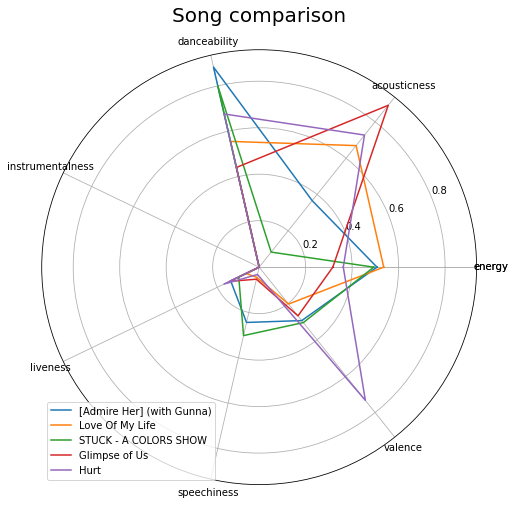

In [122]:
n_songs = 5
audio_categories = ["energy", "acousticness", "danceability", "instrumentalness", "liveness","speechiness", "valence"]
audio_categories = [*audio_categories, audio_categories[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(audio_categories))

track_0 = twenty_four_tracks_df.loc[0, audio_categories].values

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

for i in np.arange(len(twenty_four_tracks_df))[:n_songs]:
    this_track = twenty_four_tracks_df.loc[i, audio_categories].values
    plt.plot(label_loc, this_track, label=twenty_four_tracks_df.loc[i, "name"])

plt.title('Song comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=audio_categories)
audio_categories = audio_categories[:-1]
plt.legend()
plt.show()

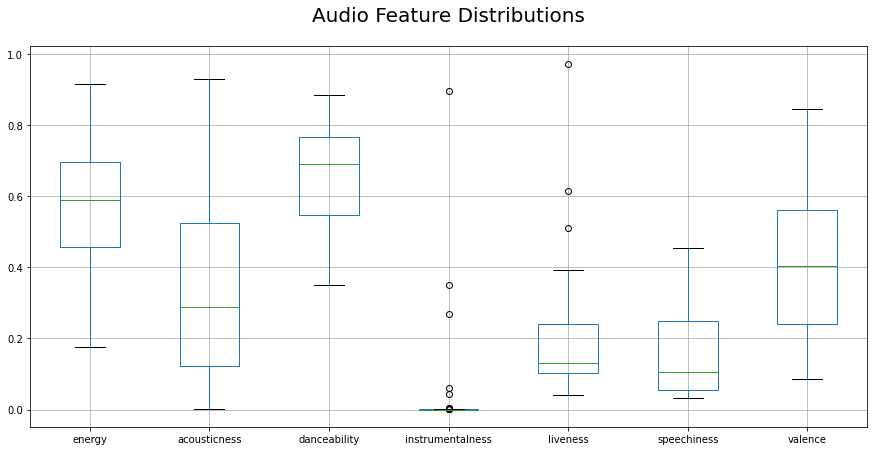

In [124]:
twenty_four_tracks_df[audio_categories].boxplot(figsize=(15, 7))
plt.title('Audio Feature Distributions', size=20, y=1.05);

## analyzing the first track of my "24" playlist
api docs: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis

In [133]:
first_track = twenty_four_tracks_df.loc[0, "uri"]
print(twenty_four_tracks_df.loc[0, "name"])
first_track

[Admire Her] (with Gunna)


'spotify:track:4wJKTG3bAleqUXmylh83Id'

In [10]:
first_track_audio_analysis = spotify.audio_analysis(first_track)
first_track_audio_analysis

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1649988903,
  'analysis_time': 6.87382,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 3478990,
  'duration': 157.77731,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.0,
  'start_of_fade_out': 157.77733,
  'loudness': -7.188,
  'tempo': 138.008,
  'tempo_confidence': 0.702,
  'time_signature': 4,
  'time_signature_confidence': 1.0,
  'key': 1,
  'key_confidence': 0.453,
  'mode': 0,
  'mode_confidence': 0.488,
  'codestring': 'eJxVmlkCHSkOBK9SR2Bf7n-xiUhe2572hw2PArSlUqJPLfvMfu5XvjHXba2P9o26vnPHOXWO-p3evrNbG2Wu_tXSxtdZdc9d86vt-GUre-2vrsuHa5Z9Vx1fq3t9i99qmaV8bd7mIaxsHNjLyJlzr9Xq1znuO7We1dr--i2DQ-sY8_b7jT7fHdhx72_sdb4-d2evOr_ZuO86s6zR68clG7fs5dRdy_lW4Yb77NG52f7W4I582m4d-37rjvHNPnvvXnn360H1ID6K2IcNnrBc6zttLs5dZ7ReOuu4ZJ21D1a079ZWvjMq0u5

In [259]:
first_track_audio_analysis

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1649988903,
  'analysis_time': 6.87382,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 3478990,
  'duration': 157.77731,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.0,
  'start_of_fade_out': 157.77733,
  'loudness': -7.188,
  'tempo': 138.008,
  'tempo_confidence': 0.702,
  'time_signature': 4,
  'time_signature_confidence': 1.0,
  'key': 1,
  'key_confidence': 0.453,
  'mode': 0,
  'mode_confidence': 0.488,
  'codestring': 'eJxVmlkCHSkOBK9SR2Bf7n-xiUhe2572hw2PArSlUqJPLfvMfu5XvjHXba2P9o26vnPHOXWO-p3evrNbG2Wu_tXSxtdZdc9d86vt-GUre-2vrsuHa5Z9Vx1fq3t9i99qmaV8bd7mIaxsHNjLyJlzr9Xq1znuO7We1dr--i2DQ-sY8_b7jT7fHdhx72_sdb4-d2evOr_ZuO86s6zR68clG7fs5dRdy_lW4Yb77NG52f7W4I582m4d-37rjvHNPnvvXnn360H1ID6K2IcNnrBc6zttLs5dZ7ReOuu4ZJ21D1a079ZWvjMq0u5

#### Track

In [39]:
ft_track = pd.DataFrame(first_track_audio_analysis["track"],
                        index=[first_track]).reset_index().rename(columns={"index": "track_uri"})
ft_track

,track_uri,num_samples,duration,sample_md5,offset_seconds,window_seconds,analysis_sample_rate,analysis_channels,end_of_fade_in,start_of_fade_out,...,mode,mode_confidence,codestring,code_version,echoprintstring,echoprint_version,synchstring,synch_version,rhythmstring,rhythm_version
0,spotify:track:4wJKTG3bAleqUXmylh83Id,3478990,157.77731,,0,0,22050,1,0.0,157.77733,...,0,0.488,eJxVmlkCHSkOBK9SR2Bf7n-xiUhe2572hw2PArSlUqJPLf...,3.15,eJztnQuyLLeNRLdU_JPL4Xf_S5iTaI1beuHmteK-Z2k8jt...,4.12,eJxVmAuWZCkIRLfiEp6Iv_1vbCIuZs3MqeosUxH5BtAR3_...,1.0,eJxVWtlhJCsMTKVDAIE48k_sqQ7G-z68a890g9BZKtF7i_...,1.0


#### Bars
The time intervals of the bars throughout the track. A bar (or measure) is a segment of time defined as a given number of beats.

In [48]:
ft_bars = pd.DataFrame.from_dict(first_track_audio_analysis["bars"])
ft_bars

,start,duration,confidence
0,0.03057,1.75467,0.534
1,1.78524,1.74754,0.561
2,3.53278,1.73737,0.384
3,5.27015,1.74079,0.702
4,7.01094,1.73899,0.518
...,...,...,...
84,144.39258,1.73961,0.520
85,146.13219,1.73746,0.123
86,147.86964,1.74174,0.576
87,149.61139,1.73673,0.184


#### Beats
The time intervals of beats throughout the track. A beat is the basic time unit of a piece of music; for example, each tick of a metronome. Beats are typically multiples of tatums.

In [47]:
ft_beats = pd.DataFrame.from_dict(first_track_audio_analysis["beats"])
ft_beats

,start,duration,confidence
0,0.03057,0.43975,0.904
1,0.47032,0.43920,0.520
2,0.90952,0.43794,0.399
3,1.34746,0.43778,0.411
4,1.78524,0.43622,0.457
...,...,...,...
351,152.65388,0.43372,0.517
352,153.08760,0.43605,0.106
353,153.52365,0.43180,0.116
354,153.95544,0.42366,0.037


#### Sections
Sections are defined by large variations in rhythm or timbre, e.g. chorus, verse, bridge, guitar solo, etc. Each section contains its own descriptions of tempo, key, mode, time_signature, and loudness.

In [157]:
ft_sections = pd.DataFrame.from_dict(first_track_audio_analysis["sections"])
print("key:  " + str(ft_sections["key"].values))
print("mode: " + str(ft_sections["mode"].values))
ft_sections

key:  [6 6 4 2 1 1 2 1]
mode: [0 0 1 1 0 0 1 0]


,start,duration,confidence,loudness,tempo,tempo_confidence,key,key_confidence,mode,mode_confidence,time_signature,time_signature_confidence
0,0.00000,14.37591,1.000,-15.058,138.273,0.518,6,0.000,0,0.000,4,1.0
1,14.37591,14.34309,0.780,-5.722,138.022,0.759,6,0.769,0,0.697,4,1.0
2,28.71901,14.78350,0.626,-5.624,138.229,0.638,4,0.000,1,0.133,4,1.0
3,43.50251,26.53708,0.409,-6.981,137.863,0.768,2,0.006,1,0.270,4,1.0
4,70.03959,28.67597,0.012,-6.534,138.336,0.701,1,0.069,0,0.244,4,1.0
5,98.71556,13.04623,0.235,-6.882,138.072,0.677,1,0.659,0,0.596,4,1.0
6,111.76179,28.70798,0.358,-6.276,138.102,0.712,2,0.495,1,0.509,4,1.0
7,140.46977,17.30756,1.000,-23.805,137.945,0.632,1,0.000,0,0.000,4,1.0


#### Segments
Each segment contains a roughly conisistent sound throughout its duration.

In [45]:
ft_segments = pd.DataFrame.from_dict(first_track_audio_analysis["segments"])
ft_segments

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,pitches,timbre
0,0.00000,0.42354,0.000,-26.484,0.03515,-13.748,0.0,"[0.01, 0.222, 0.018, 0.106, 1.0, 0.074, 0.005,...","[41.653, -61.056, 10.142, 53.945, -17.195, -7...."
1,0.42354,0.44667,0.419,-28.306,0.12526,-21.521,0.0,"[0.045, 0.837, 0.052, 0.051, 0.292, 0.054, 0.0...","[35.36, -94.136, -3.723, -18.143, -22.551, -16..."
2,0.87020,0.16313,0.664,-28.661,0.06377,-20.984,0.0,"[0.062, 0.25, 0.028, 0.636, 0.098, 0.02, 0.02,...","[37.283, -120.133, 90.851, 12.797, 52.743, -22..."
3,1.03333,0.25034,0.531,-24.718,0.06030,-18.170,0.0,"[0.08, 0.9, 0.075, 0.534, 0.321, 0.093, 0.042,...","[38.515, -44.926, 92.127, 30.971, 20.942, -28...."
4,1.28367,0.44617,0.429,-26.759,0.04545,-20.984,0.0,"[0.286, 0.26, 0.189, 0.451, 0.335, 0.12, 0.162...","[36.656, -54.3, 115.366, 37.764, 39.803, -15.6..."
...,...,...,...,...,...,...,...,...,...
544,152.93723,0.41179,0.349,-36.232,0.06353,-32.665,0.0,"[0.096, 0.289, 0.113, 0.132, 0.586, 0.194, 0.5...","[24.88, -154.611, 9.045, -10.593, 35.919, -29...."
545,153.34901,0.15288,0.006,-39.097,0.01941,-36.033,0.0,"[0.102, 0.847, 0.455, 0.147, 1.0, 0.438, 0.498...","[21.972, -149.391, -5.673, -4.384, 46.132, -54..."
546,153.50190,0.29546,0.208,-40.318,0.04524,-37.310,0.0,"[0.079, 0.399, 0.174, 0.079, 0.587, 0.242, 0.4...","[20.303, -116.298, -8.389, -2.661, 40.849, -46..."
547,153.79736,0.71410,0.125,-42.280,0.01760,-39.714,0.0,"[0.104, 0.65, 0.196, 0.146, 1.0, 0.301, 0.608,...","[17.123, -100.073, -21.06, 16.164, 68.668, -68..."


In [160]:
print(ft_segments["pitches"][0])
print(ft_segments["timbre"][0])

[0.01, 0.222, 0.018, 0.106, 1.0, 0.074, 0.005, 0.014, 0.12, 0.01, 0.008, 0.099]
[41.653, -61.056, 10.142, 53.945, -17.195, -7.59, 19.035, 8.975, -24.661, 10.292, 12.911, 40.323]


#### Tatums
A tatum represents the lowest regular pulse train that a listener intuitively infers from the timing of perceived musical events (segments).

In [44]:
ft_tatums = pd.DataFrame.from_dict(first_track_audio_analysis["tatums"])
ft_tatums

,start,duration,confidence
0,0.03057,0.29316,0.904
1,0.32374,0.14658,0.904
2,0.47032,0.29280,0.520
3,0.76312,0.14640,0.520
4,0.90952,0.29196,0.399
...,...,...,...
707,153.81152,0.14393,0.116
708,153.95544,0.28244,0.037
709,154.23788,0.14122,0.037
710,154.37910,0.28244,0.051


In [162]:
ft_tatums["end"] = ft_tatums["start"] + ft_tatums["duration"]
ft_tatums

,start,duration,confidence,end
0,0.03057,0.29316,0.904,0.32373
1,0.32374,0.14658,0.904,0.47032
2,0.47032,0.29280,0.520,0.76312
3,0.76312,0.14640,0.520,0.90952
4,0.90952,0.29196,0.399,1.20148
...,...,...,...,...
707,153.81152,0.14393,0.116,153.95545
708,153.95544,0.28244,0.037,154.23788
709,154.23788,0.14122,0.037,154.37910
710,154.37910,0.28244,0.051,154.66154


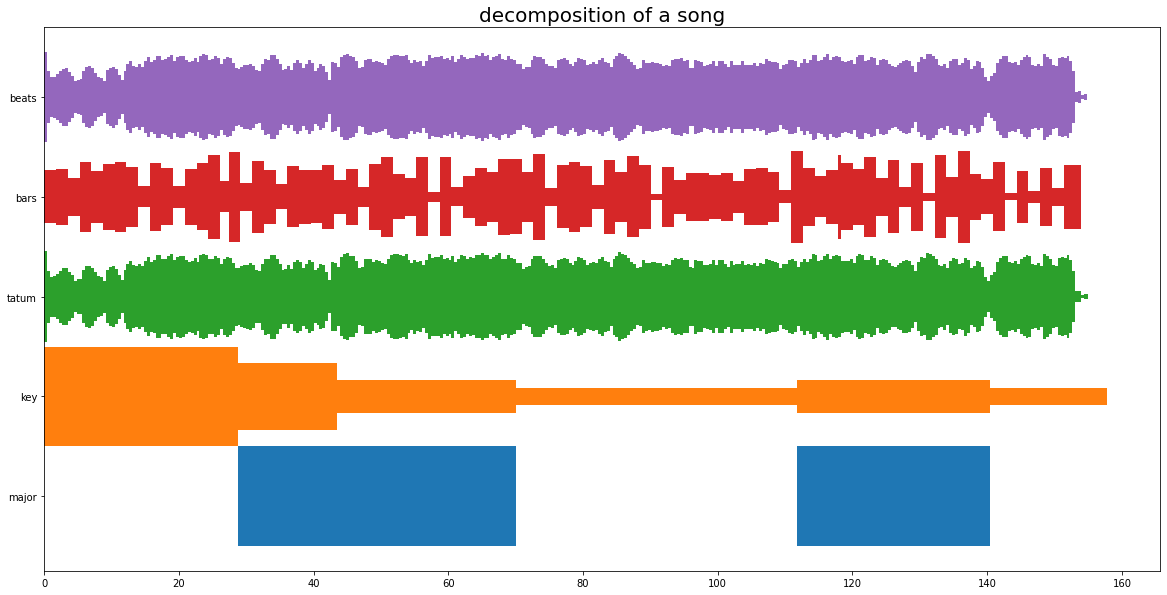

In [219]:
plt.figure(figsize=(20,10))
plt.barh(y=["major"],
         height=ft_sections["mode"],
         width=ft_sections.duration,
         left=ft_sections.start);

plt.barh(y=["key"],
         height=ft_sections["key"] / 6,
         width=ft_sections.duration,
         left=ft_sections.start);

plt.barh(y=["tatum"],
         height=ft_tatums.confidence,
         width=ft_tatums.duration,
         left=ft_tatums.start);

plt.barh(y=["bars"],
         height=ft_bars.confidence,
         width=ft_bars.duration,
         left=ft_bars.start);

plt.barh(y=["beats"],
         height=ft_beats.confidence,
         width=ft_beats.duration,
         left=ft_beats.start);

plt.title("decomposition of a song", size=20);

## Playlist Analysis

In [317]:
def gather_playlist_tracks(uri):
    playlist = spotify.playlist(uri)
    playlist_tracks = spotify.playlist_tracks(uri)
    playlist_tracks_df = pd.DataFrame.from_dict(playlist_tracks)
    track_info_df = pd.concat(playlist_tracks_df["items"].apply(lambda x: pd.json_normalize(x["track"],
                                                                          sep='_')).values.tolist())
    track_info_df.index = playlist_tracks_df.index
    playlist_tracks_df[track_info_df.columns] = track_info_df
    audio_features_df = pd.concat(playlist_tracks_df["uri"].apply(lambda x: 
                                                                  pd.json_normalize(spotify.audio_features(x),
                                                                                   sep='_')).values.tolist())
    audio_features_df.index = playlist_tracks_df.index
    playlist_tracks_df[audio_features_df.columns] = audio_features_df
    playlist_tracks_df["artists"] = playlist_tracks_df["artists"].apply(lambda x: ", ".join(pd.DataFrame.from_dict(x)["name"].values))
    playlist_tracks_df = playlist_tracks_df[["name", "artists", "energy", "acousticness", "danceability",
                                             "instrumentalness", "liveness", "loudness", "speechiness",
                                             "tempo", "valence", "time_signature", "popularity"]]
    playlist_tracks_df["playlist"] = playlist["name"]
    return playlist_tracks_df

In [335]:
my_playlists = spotify.user_playlists(adams_username)
my_playlists = pd.DataFrame.from_dict(my_playlists)
my_playlists["uri"] = my_playlists["items"].apply(lambda x: x["uri"].split(":")[-1])
my_playlists.head()

,href,items,limit,next,offset,previous,total,uri
0,https://api.spotify.com/v1/users/dlr2wps2d39pn...,"{'collaborative': False, 'description': '', 'e...",50,None,0,None,25,2jE01adXXfh1ePiMG980re
1,https://api.spotify.com/v1/users/dlr2wps2d39pn...,"{'collaborative': False, 'description': '', 'e...",50,None,0,None,25,7etkOcf7ByEDQU611v8Hd0
2,https://api.spotify.com/v1/users/dlr2wps2d39pn...,"{'collaborative': False, 'description': '', 'e...",50,None,0,None,25,5KvRIeUYxCFLFsiOD8YcVB
3,https://api.spotify.com/v1/users/dlr2wps2d39pn...,"{'collaborative': False, 'description': '', 'e...",50,None,0,None,25,33iyLYqv711gFfXnrrJzcU
4,https://api.spotify.com/v1/users/dlr2wps2d39pn...,"{'collaborative': False, 'description': '', 'e...",50,None,0,None,25,1kL8VANGj8XsKPpkrsk8OR


In [339]:
all_playlists = pd.DataFrame(columns=["name", "artists", "energy", "acousticness", "danceability",
                                      "instrumentalness", "liveness", "loudness", "speechiness",
                                      "tempo", "valence", "time_signature", "popularity"])
for playlist in my_playlists["uri"]:
    try:
        all_playlists = pd.concat([all_playlists, gather_playlist_tracks(playlist)])
    except Exception as e:
        print(e)
all_playlists

Expected id of type track but found type Enchanted spotify:local:J+Cole:Friday+Night+Lights:Enchanted:251


'NoneType' object has no attribute 'values'
'NoneType' object is not iterable


Expected id of type track but found type The+Jig+Is+Up+%28Dump%27n%29 spotify:local:Kendrick+Lamar:Welcome+To+Compton:The+Jig+Is+Up+%28Dump%27n%29:234


'NoneType' object has no attribute 'values'


Expected id of type track but found type Kill+Jay+Z spotify:local:JAY-Z:4%3A44:Kill+Jay+Z:178


'NoneType' object has no attribute 'values'


Expected id of type track but found type Cartoon+%26+Cereal spotify:local:Kendrick+Lamar::Cartoon+%26+Cereal:408


'NoneType' object has no attribute 'values'


Expected id of type track but found type U.O.E.N.O.+Remix spotify:local:Black+Hippy::U.O.E.N.O.+Remix:337


'NoneType' object has no attribute 'values'


,name,artists,energy,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,popularity,playlist
0,[Admire Her] (with Gunna),"Bas, Gunna",0.507,0.3660,0.883,0.000000,0.1360,-7.188,0.2440,138.008,0.294,4,65,24
1,Love Of My Life,Harry Styles,0.536,0.6690,0.555,0.000000,0.0623,-8.233,0.0452,118.057,0.203,4,89,24
2,STUCK - A COLORS SHOW,WESTSIDE BOOGIE,0.493,0.0829,0.802,0.000015,0.0974,-9.090,0.3020,159.996,0.305,4,50,24
3,Glimpse of Us,Joji,0.317,0.8910,0.440,0.000005,0.1410,-9.258,0.0531,169.914,0.268,3,89,24
4,Hurt,Arlo Parks,0.362,0.7270,0.676,0.000228,0.1680,-9.492,0.0323,94.959,0.733,4,29,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Jump Off The Roof,"Vince Staples, Snoh Aalegra",0.945,0.0859,0.732,0.000998,0.4760,-5.429,0.0812,120.026,0.621,4,47,Big Vibes
11,Golden Slumbers - Remastered 2009,The Beatles,0.152,0.3260,0.419,0.003400,0.1130,-12.126,0.0277,80.608,0.239,4,63,Big Vibes
12,Cudi Montage,KIDS SEE GHOSTS,0.504,0.4010,0.729,0.000001,0.1210,-6.784,0.0321,110.011,0.305,4,62,Big Vibes
13,The Manipulation,Wale,0.449,0.5670,0.686,0.000000,0.3650,-13.455,0.3860,89.940,0.652,4,16,Big Vibes


In [340]:
all_playlists.groupby("playlist").mean()

,energy,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence
playlist,,,,,,,,,
24,0.588420,0.342125,0.657720,0.032615,0.190398,-7.621620,0.155536,112.921080,0.405080
Beautiful Shit,0.361893,0.629357,0.360500,0.223752,0.183100,-11.221500,0.049643,140.046929,0.309000
Big Vibes,0.560200,0.347507,0.590600,0.002747,0.296667,-8.322600,0.117040,99.557733,0.356133
Funky stuff,0.532000,0.074900,0.606000,0.000000,0.058100,-8.916000,0.046400,87.827000,0.199000
My Peloton Music by fasky,0.744760,0.151469,0.625080,0.021480,0.289948,-5.394880,0.204528,121.825000,0.508360
Rock Mood,0.842727,0.044202,0.473136,0.035925,0.184523,-4.958318,0.062514,129.971818,0.507727
Songs where they hit a note and I'm like 'woah',0.185508,0.766833,0.230208,0.874083,0.125875,-18.732917,0.039108,110.822167,0.068400
Tomorrow's Listens,0.517302,0.386799,0.584053,0.066047,0.221241,-9.356663,0.132846,113.972600,0.390445
Vibing,0.574300,0.283705,0.612600,0.057447,0.147500,-8.498800,0.119270,113.883800,0.424100
